In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, fbeta_score


df = pd.read_csv('GeneralDatensatz18-21ohneGeo-mitLockdown_mitCorona.csv', sep=';')

X=df[['UMONAT','USTUNDE','UWOCHENTAG','UART','USTRZUSTAND','BEZ','UTYP1','ULICHTVERH','IstRad','IstPKW','IstFuss','IstKrad','IstGkfz','IstSonstige', 'LOCKDOWN', 'COVID']]
#für tödliche Unfälle

# KFold-Konfiguration
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#für tödliche und schwere vs. leichte Unfälle  -> 1 ist schwer oder tödlich, 0 ist leicht
y = df['UKATEGORIE'].isin([1, 2]).astype(int)





In [2]:
# erstmal alle Parameter einzeln mit class weight 9 und fbeta mit beta = 2
beta = 2
fbeta_scorer= make_scorer(fbeta_score, beta=beta)
class_weight_optimiert = {0:1, 1: 9}


max_index = 0
max_score = 0
number_trees = []
results = []



for i in range (1, 50):
    rf_clas = RandomForestClassifier(max_depth = i, random_state=42, class_weight=class_weight_optimiert)
    result_fbeta = cross_val_score(rf_clas, X, y, cv=kf, scoring=fbeta_scorer)
    if result_fbeta.mean() > max_score: 
        max_index = i
        max_score = result_fbeta.mean()
        print(f"bester score bei max_depth = {i}")
    number_trees.append(i)
    results.append(result_fbeta.mean())
    print(f"Fbeta-score mit max-depth = {i}:", result_fbeta.mean())





bester score bei max_depth = 1
Fbeta-score mit max-depth = 1: 0.47597380162804387
Fbeta-score mit max-depth = 2: 0.47597380162804387
bester score bei max_depth = 3
Fbeta-score mit max-depth = 3: 0.4760326821736173
bester score bei max_depth = 4
Fbeta-score mit max-depth = 4: 0.48750337913202346
bester score bei max_depth = 5
Fbeta-score mit max-depth = 5: 0.49711183207185095
bester score bei max_depth = 6
Fbeta-score mit max-depth = 6: 0.4999842213162012
bester score bei max_depth = 7
Fbeta-score mit max-depth = 7: 0.502879843852442
bester score bei max_depth = 8
Fbeta-score mit max-depth = 8: 0.503347266813905
Fbeta-score mit max-depth = 9: 0.5004582100542592
Fbeta-score mit max-depth = 10: 0.4929265994516512
Fbeta-score mit max-depth = 11: 0.4802503356480957
Fbeta-score mit max-depth = 12: 0.456968443714832
Fbeta-score mit max-depth = 13: 0.4265524494376355
Fbeta-score mit max-depth = 14: 0.3931736691228517
Fbeta-score mit max-depth = 15: 0.35473529049260943
Fbeta-score mit max-depth

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


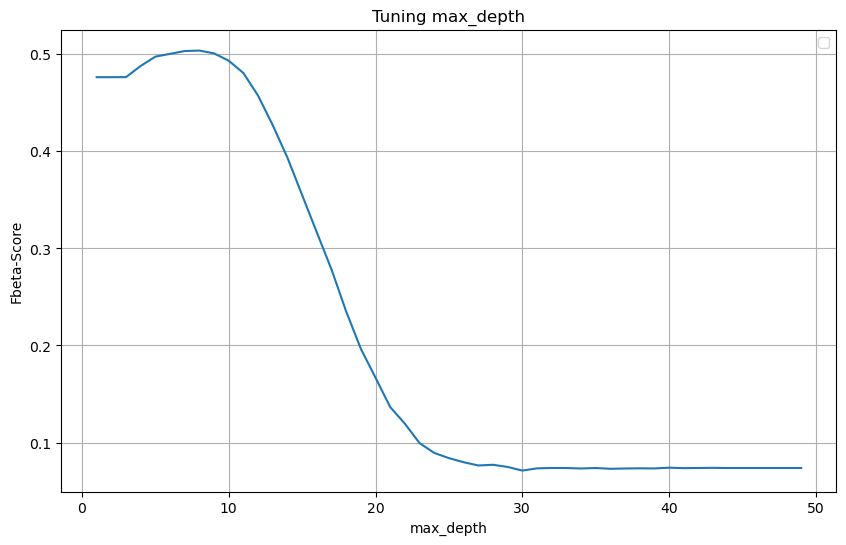

In [3]:
from matplotlib import pyplot as plt

# F1-Scores plotten
plt.figure(figsize=(10, 6))
plt.plot(number_trees, results)

plt.title('Tuning max_depth')
plt.xlabel('max_depth')
plt.ylabel('Fbeta-Score')
plt.legend()
plt.grid(True)
plt.show()